## Problem Statement

Indian Premier League (IPL) is a league for Twenty20 (T20) cricket championships started in India. The auction price of the player depends on his performance in test matches or one-day internationals. The primary skill of the player also contributes to the auction price. We use different regression techniques to predict the auction price of the player.

## About the dataset (IPL Auction data)

**PLAYER NAME**: Name of the player<br>
**AGE**: The age of the player is classified into three categories. Category 1 means the player is less than 25 years old. Category 2 means the player is between 25 and 35 years and Category 3 means the player has aged more than 35.<br>
**COUNTRY**: Country of the player<br>
**PLAYING ROLE**: Player's primary skill<br>
**T-RUNS**: Total runs scored in the test matches<br>
**T-WKTS**: Total wickets taken in the test matches<br>
**ODI-RUNS-S**: Runs scored in One Day Internationals<br>
**ODI-SR-B**: Batting strike rate in One Day Internationals<br>
**ODI-WKTS**: Wickets taken in One Day Internationals<br>
**ODI-SR-BL**: Bowling strike rate in One Day Internationals<br>
**CAPTAINCY EXP**: Captained a team or not<br>
**RUNS-S**: Number of runs scored by a player<br>
**HS**: Highest score by a batsman in IPL<br>
**AVE**: Average runs scored by a batsman in IPL<br>
**SR-B**: Batting strike rate (ratio of the number of runs scored to the number of basses faced) in IPL.<br>
**SIXERS**: Number of six runs scored by a player in IPL.<br>
**RUNS-C**: Number of runs conceded by a player<br>
**WKTS**: Number of wickets were taken by a player in IPL.<br>
**AVE-BL**: Bowling average (number of runs conceded / number of wickets taken) in IPL.<br>
**ECON**: Economy rate of a bowler in IPL (number of runs conceded by the bowler per over).<br>
**SR-BL**: Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL.<br>
**SOLD PRICE**: Auction price of the player<br>

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [11]:
#Extra from slide 8 to 16
import numpy as np
mileage=np.array([10,13,14])
premium=np.array([120,115,135])

print(mileage, premium)
beta1 = 2.5    #set it as constant
beta0=0
y_pred = beta0 + beta1*mileage     # this is the regression model

cost_func = np.sum((premium -y_pred)**2)   # error function calculation
print("For beta0 = 0 CF=",cost_func )

[10 13 14] [120 115 135]
For beta0 = 0 CF= 25831.25


In [12]:
beta1 = 2.5    #set it as constant
beta0=20
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium -y_pred)**2)
print("For beta0 = 20 CF=",cost_func )

For beta0 = 20 CF= 15931.25


In [13]:
beta0 = 50
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium-y_pred)**2)
print("For beta0 = 50 CF=",cost_func )

beta0 = 90
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium-y_pred)**2)
print("For beta0 = 90 CF=",cost_func )

beta0 = 110
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium-y_pred)**2)
print("For beta0 = 110 CF=",cost_func )

For beta0 = 50 CF= 5581.25
For beta0 = 90 CF= 181.25
For beta0 = 110 CF= 1081.25


*   For beta0 = 90 the cost function = 181.25  is least

In [9]:
beta0 = 92
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium-y_pred)**2)
print("For beta0 = 92 CF=",cost_func )

beta0 = 92.5
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium-y_pred)**2)
print("For beta0 = 92.5 CF=",cost_func )

beta0 = 93
y_pred = beta0 + beta1*mileage
cost_func=np.sum((premium-y_pred)**2)
print("For beta0 = 93 CF=",cost_func )

For beta0 = 92 CF= 163.25
For beta0 = 92.5 CF= 162.5
For beta0 = 93 CF= 163.25


14
14


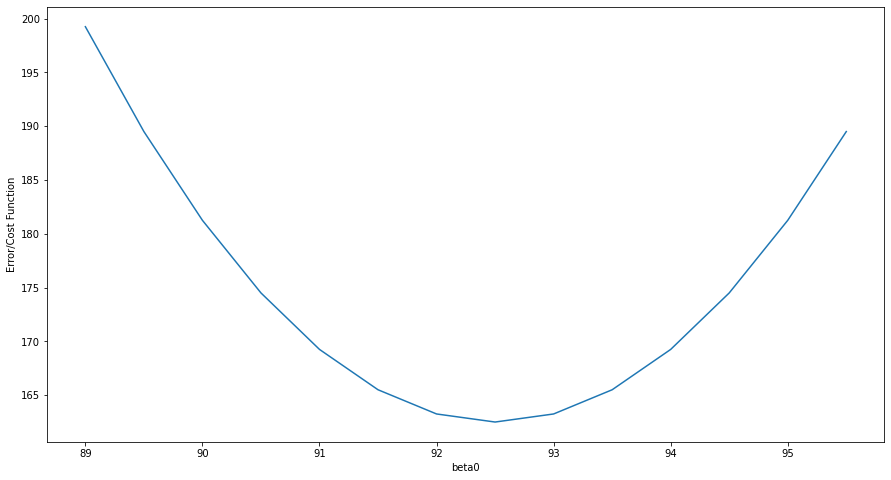

In [14]:
import random
from pandas import Series
mileage=np.array([10,13,14])
premium=np.array([120,115,135])

#print(mileage, premium)
beta1 = 2.5    #set it as constant
cost_func1=[]
lst=[]    # list of beta values

#plt.scatter(mileage, premium, s=30, c='b')
beta0=88.5     # start with 88.5 to find a minimum error point closer to 90
for i in range(1,15):
    beta0 = beta0 + 0.5     # increment beta0 in steps of 0.5
    lst = lst + [beta0]
    y_pred1 = beta0 + beta1*mileage   # beta1=2.5
    cost_func1 = cost_func1 + [np.sum((premium - y_pred1)**2)]     #store in a list

print(len(lst))
print(len(cost_func1))
#tab=pd.Series(cost_func1, index= lst)
#print(tab)

plt.plot(lst, cost_func1)
plt.xlabel("beta0")
plt.ylabel("Error/Cost Function")
plt.show()

In [15]:
print(lst,cost_func1)

[89.0, 89.5, 90.0, 90.5, 91.0, 91.5, 92.0, 92.5, 93.0, 93.5, 94.0, 94.5, 95.0, 95.5] [199.25, 189.5, 181.25, 174.5, 169.25, 165.5, 163.25, 162.5, 163.25, 165.5, 169.25, 174.5, 181.25, 189.5]


* Error surface will always be a cup shaped figure. Because it a cup shaped figure it is a convex function
* Property of convex function is that it has a unique minimum
* From the above figure we see that we are updating beta0 such that we are coming down the error surface
* At betao=92.5 and beta1= 2.5 the error is minimum so that is required solution
* Or these are the optimal values of beta0 and beta1

* Lets understand  here how do we come down this error surface?
* we start at any point on the surface say any given (beta0, beta1)
* Then we take a small step along the tangent at that point 
* so we beta0=beta0 - de/db0 * learning rate
* here learning rate has to be small else we wil leave the surface
* as we keep moving downward in the direction of gradient after few iterations we will hit the bottom of the surface
* At the bottom of the error surface the error is minimum and the value of beta0 at this point is the  optimal value of beta0.
* We stop the iteration when the value of error becomes steady or changes very slowly

* Main concepts here are how do we update the beta0 values in the direction of gradient. What are the mathematical expressions corresponding to it




<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [ ]:
# load the csv file
# store the data in 'df_ipl'
#df_ipl = pd.read_csv("ipl_player_auction.csv")
df_ipl = pd.read_csv('ipl_player_auction.csv')

# display first five observations using head()
df_ipl.head()

**Let us now see the number of variables and observations in the data.**

In [8]:
# use 'shape' to check the dimension of data
df_ipl.shape

(130, 22)

**Interpretation:** The data has 130 observations and 22 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [9]:
# use 'dtypes' to check the data type of a variable
df_ipl.dtypes

PLAYER NAME       object
AGE                int64
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

In [10]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   PLAYING ROLE   130 non-null    object 
 4   T-RUNS         130 non-null    int64  
 5   T-WKTS         130 non-null    int64  
 6   ODI-RUNS-S     130 non-null    int64  
 7   ODI-SR-B       130 non-null    float64
 8   ODI-WKTS       130 non-null    int64  
 9   ODI-SR-BL      130 non-null    float64
 10  CAPTAINCY EXP  130 non-null    int64  
 11  RUNS-S         130 non-null    int64  
 12  HS             130 non-null    int64  
 13  AVE            130 non-null    float64
 14  SR-B           130 non-null    float64
 15  SIXERS         130 non-null    int64  
 16  RUNS-C         130 non-null    int64  
 17  WKTS           130 non-null    int64  
 18  AVE-BL    

**Interpretation:** The variables `PLAYER NAME`, `COUNTRY` and `PLAYING ROLE` are categorical. All the remaining variables are numerical. 

From the above output, we see that the data type of `AGE` and `CAPTAINCY EXP` is 'int64'.

But according to the data definition, `AGE` and `CAPTAINCY EXP` are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [11]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'AGE' 
df_ipl['AGE'] = df_ipl['AGE'].astype('object')

# change the data type of 'CAPTAINCY EXP'
df_ipl['CAPTAINCY EXP'] = df_ipl['CAPTAINCY EXP'].astype('object')

#### Recheck the data type after the conversion. 

In [12]:
# recheck the data types using 'dtypes'
df_ipl.dtypes

PLAYER NAME       object
AGE               object
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP     object
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

In [13]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    object 
 2   COUNTRY        130 non-null    object 
 3   PLAYING ROLE   130 non-null    object 
 4   T-RUNS         130 non-null    int64  
 5   T-WKTS         130 non-null    int64  
 6   ODI-RUNS-S     130 non-null    int64  
 7   ODI-SR-B       130 non-null    float64
 8   ODI-WKTS       130 non-null    int64  
 9   ODI-SR-BL      130 non-null    float64
 10  CAPTAINCY EXP  130 non-null    object 
 11  RUNS-S         130 non-null    int64  
 12  HS             130 non-null    int64  
 13  AVE            130 non-null    float64
 14  SR-B           130 non-null    float64
 15  SIXERS         130 non-null    int64  
 16  RUNS-C         130 non-null    int64  
 17  WKTS           130 non-null    int64  
 18  AVE-BL    

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `PLAYER NAME` contains the name of the player, which is redundant for further analysis. Thus, we drop the column.

In [14]:
# drop the column 'PLAYER NAME' using drop()
# 'axis = 1' drops the specified column
df_ipl = df_ipl.drop('PLAYER NAME', axis = 1)

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [15]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_ipl.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_ipl.isnull().sum()*100/df_ipl.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
SOLD PRICE,0,0.000000
CAPTAINCY EXP,0,0.000000
COUNTRY,0,0.000000
PLAYING ROLE,0,0.000000
T-RUNS,0,0.000000
T-WKTS,0,0.000000
ODI-RUNS-S,0,0.000000
ODI-SR-B,0,0.000000
ODI-WKTS,0,0.000000
ODI-SR-BL,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="dummy"></a>
## 2.5 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [16]:
# store the target variable 'SOLD PRICE' in a dataframe 'df_target'
df_target = df_ipl['SOLD PRICE']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'SOLD PRICE' using drop()
# 'axis = 1' drops the specified column
df_feature = df_ipl.drop('SOLD PRICE', axis = 1)

#### Filter numerical and categorical variables.

In [17]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL'],
      dtype='object')

In [18]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP'], dtype='object')

The regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [19]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables for 'medincome'
dummy_var = pd.get_dummies(data = df_cat, drop_first=True)

#### Concatenate numerical and dummy encoded categorical variables.

In [20]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_ipl_dummy = pd.concat([df_num, dummy_var], axis=1)

# display first five observations
df_ipl_dummy.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_Bangladesh,COUNTRY_England,COUNTRY_India,COUNTRY_New Zealand,COUNTRY_Pakistan,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_West Indies,COUNTRY_Zimbabwe,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.000000,0,0.000000,0,0,0.000000,0.000000,0,307,15,20.470000,9.900000,13.930000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,266,18,657,71.410000,185,37.600000,0,0,0.000000,0.000000,0,29,0,0.000000,17.500000,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,669,58,1269,80.620000,288,32.900000,167,39,18.560000,121.010000,5,1059,29,36.520000,8.810000,24.900000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,308,31,241,84.560000,51,36.800000,58,11,5.800000,76.320000,0,1125,49,22.960000,8.230000,22.140000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,109,0,79,45.930000,0,0.000000,1317,71,32.930000,120.710000,28,0,0,0.000000,1.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


**Interpretation:** We can see that the dummy variables are added to the data. '1' in the column 'AGE_2' represents that the age of the corresponding player is between 25 to 35 years. Also, the '0' in both the columns 'AGE_2' and 'AGE_3' indicates that the age of the corresponding player is less than 25.

<a id="scale"></a>
## 2.6 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [21]:
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'df_ipl_dummy'
X = X_scaler.fit_transform(df_ipl_dummy)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_target - df_target.mean()) / df_target.std()
#X[1:10]

* Why do we scale the categorical data too? This is because we have to update the coeffcients of the categorical variable and for that they have to be treated as continuous

<a id="split"></a>
## 2.7 Train-Test Split

Before applying variour regression techniques to predict the auction price of the player, let us split the dataset in train and test set.

In [22]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (104, 31)
y_train (104,)
X_test (26, 31)
y_test (26,)


In [23]:
X = X_train.copy()
Y = y_train.copy()

<a id="GD"></a>
# 4. Gradient Descent

In [24]:
#import random
#random.seed(10)
#print(random.random())

#from random import ra#ndom
#print(random())

## Step 1: Random Initialization of the Bias (intercept  Betao) and 
## Weights (feature weight,  betai's, beta1, beta2..)

In [27]:
import random

# dim: number of features in the dataset
def initialize_bw(dim):    #beta0, beta1,...betan

    # set the seed to 42
    np.random.seed(seed = 42)
    random.seed(42)
    
    # initialize the bias
    b = random.random()
    
    # initialize the weights
    w = np.random.rand(dim)
    
    return b, w

* np.random.rand () generates random numbers from the standard uniform distribution (i.e., the uniform distribution from 0 to 1), and outputs those numbers as a Numpy array.

* print(random.random())  returns a random number between 0 and 1

In [28]:
# assign random values to the bias and weights
b, w = initialize_bw(X.shape[1])
# print the bias
print('Bias: ', b)      #b is the intercept
# print the weights
print('Weights: ', w)    # w is analogous to betai's

Bias:  0.6394267984578837
Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485]


## Step 2: Predict Y values using the Bias and Weights

In [29]:
# b: bias
# w: weights
# X: input dataframe
# np.matmul(): used for matrix multiplication of weights with the input variable values
def predict_y(b,w, X):
    return b + np.matmul(X, w)      #explain

In [30]:
# Predict Y values using the Bias and Weights
y_pred = predict_y(b, w, X)

# show first 10 values of y_pred
y_pred[:10]

array([ 1.92934149, -0.37519159,  2.86929439,  0.34355276, -0.89294789,
        1.09346817, -1.66909986, -0.44609471,  4.69711482,  0.7519122 ])

## Step 3: Calculate the cost using the cost function

In [32]:
# Y: actual target values
# y_pred: predicted values
def get_cost(Y, y_pred):
    return mean_squared_error(Y, y_pred)

In [33]:
get_cost(Y, y_pred)

11.182633191773744

## Step 4: Update the Bias And the Weights

In [34]:
# X: input dataframe
# Y: actual output 
# y_pred: predicted output
# b_prev: value of bias before updation    #beta0
# w_prev: value of weights before updation  #betai's
# learning_rate (or 'alpha'): learning parameter that decides the magnitude of the update to be done to the bias annd weights

def update_bw(X, Y, y_pred, b_prev, w_prev, learning_rate):
    # gradient of bias  or beta0
    db = (np.sum(y_pred - Y) * 2) / len(Y)      
    
    # gradient of weights
    dw = (np.dot((y_pred - Y), X) * 2) / len(Y)
    
    # update the bias
    b_new = b_prev - learning_rate * db
    
    # update the weights
    w_new = w_prev - learning_rate * dw
    
    return (b_new, w_new)

In [35]:
# print the values of bias and weights obtained after initialization
print('After initialization:-  b: ',b, '\nWeights: ', w)

# print the values of bias and weights obtained after updating the bias and weights
b, w = update_bw(X, Y, y_pred, b, w, 0.01)
print('\nAfter Update:-  b: ',b, '\nWeights: ', w)

After initialization:-  b:  0.6394267984578837 
Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485]

After Update:-  b:  0.6302464943223747 
Weights:  [0.34009815 0.92437076 0.6986034  0.56006671 0.12870889 0.1377909
 0.03167861 0.84319911 0.58354148 0.68356125 0.00203213 0.94091266
 0.80499162 0.20729428 0.1754305  0.1750836  0.31176935 0.50639249
 0.4327533  0.29197438 0.616129   0.13804513 0.29937113 0.3607685
 0.4414241  0.78203968 0.20235083 0.50830569 0.59096874 0.04982211
 0.57931236]


# Write a function to find the optimal value of Bias and Weights

In [36]:
# X: input dataframe
# Y: actual output 
# learning_rate (or 'alpha'): learning parameter that decides the magnitude of the update to be done to the bias annd weights
# num_iterations: number of iterations
def GradientDescent(X, Y, alpha = 0.01, num_iterations = 100):
    # initialize the bias and weights depends on number fo columns
    b, w = initialize_bw(X.shape[1])
    
    # create a dataframe that stores the iterations and the cost
    df_iter_cost = pd.DataFrame(columns=['Iterations', 'Cost'])
    
    # iterate 
    for each_iter in range(num_iterations):
        # predict the value of y
        y_pred = predict_y(b, w, X)
        
        # calculate the cost
        cost = get_cost(Y, y_pred)
        
        # save the previous bias and weights
        b_prev = b
        w_prev = w
        
        # update the bias and weights
        b, w = update_bw(X, Y, y_pred, b_prev, w_prev, alpha)
        
        df_iter_cost.loc[each_iter] = [each_iter, cost]
        
    # print the final bias and weights
    #print("Final bias and weights:- \n", b, '\n\n', w)

    return(df_iter_cost, b, w)

In [37]:
# running gradient descent with the learning rate 0.001
df_iter_cost_1, b, w = GradientDescent(X, Y, alpha=0.001, num_iterations=1000)
#print(b,w)
#print(df_iter_cost_1)

In [38]:
# running gradient descent with the learning rate 0.1
df_iter_cost_2, b, w = GradientDescent(X, Y, alpha=0.1, num_iterations=400)
#df_iter_cost_2

Text(0, 0.5, 'Cost')

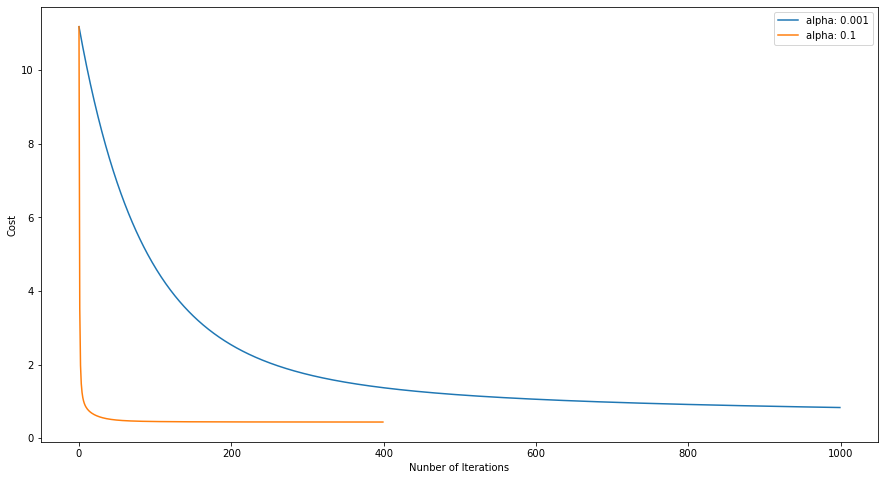

In [39]:
plt.plot(df_iter_cost_1['Iterations'], df_iter_cost_1['Cost'], label = "alpha: 0.001")
plt.plot(df_iter_cost_2['Iterations'], df_iter_cost_2['Cost'], label = "alpha: 0.1")
# place a legend on the axes
plt.legend()
# set the label for the x-axis
plt.xlabel('Nunber of Iterations')
# set the label for the y-axis
plt.ylabel('Cost')

**Interpretation:** The above plot shows that the learning is faster for alpha value is 0.01 as compared to 0.001. 
For the smaller values of the learning rate, the learning could be slower whereas higher learning rate leads to skipping the minimum of cost function. Thus, it is crucial to find the optimal value for the learning rate

# Find the optimal value for learning rate

In [40]:
# lrate: pass a list of learning rates
# validation_set: input dataframe
# target_validation_set: output (target) dataframe
def get_optimal_lrate(lrate, X, Y):

    # creating the dataframe containing the learning rate and the MSE
    opt_lrate = pd.DataFrame(columns=['Learning Rate', 'MSE'])
    
    # iterating the for loop till the length of the list 'lrate'
    for rate in range(len(lrate)):
        # getting the dataframe and the final bias and weights
        df_iter_cost, b, w = GradientDescent(X, Y, alpha = lrate[rate], num_iterations = 200)

        # predicting on train set
        ypred = predict_y(b, w, X)

        # get the mse value
        mse = get_cost(Y, ypred)
        
        # append the result in the dataframe
        opt_lrate.loc[rate] = [lrate[rate], mse]
        
        plt.plot(df_iter_cost['Iterations'], df_iter_cost['Cost'], label = "alpha: {}".format(str(lrate[rate])))
        # place a legend on the axes
        plt.legend()
        # set the label for the x-axis
        plt.xlabel('Number of Iterations')
        # set the label for the y-axis
        plt.ylabel('Cost')
    
    return(opt_lrate)

,Learning Rate,MSE
0,0.000010,10.956991
1,0.000100,9.169214
2,0.001000,2.533659
3,0.010000,0.642693
4,0.100000,0.440619
5,0.015000,0.561273
6,0.001500,1.729941
7,0.000150,8.339205


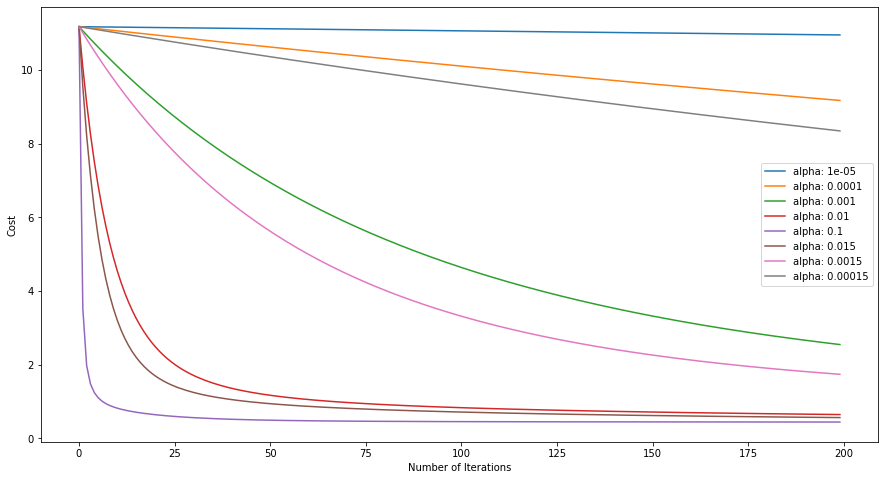

In [211]:
# lrate: list containing different values for learning rate
lrate = [0.00001,0.0001,0.001,0.01,0.1, 0.015, 0.0015, 0.00015]

# X: train set
# Y: target set for train set
get_optimal_lrate(lrate, X, Y)

# Mini-Batch Gradient Descent

In [41]:
df_ipl_dummy.head()      #original dataset 


,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_Bangladesh,COUNTRY_England,COUNTRY_India,COUNTRY_New Zealand,COUNTRY_Pakistan,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_West Indies,COUNTRY_Zimbabwe,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.000000,0,0.000000,0,0,0.000000,0.000000,0,307,15,20.470000,9.900000,13.930000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,266,18,657,71.410000,185,37.600000,0,0,0.000000,0.000000,0,29,0,0.000000,17.500000,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,669,58,1269,80.620000,288,32.900000,167,39,18.560000,121.010000,5,1059,29,36.520000,8.810000,24.900000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,308,31,241,84.560000,51,36.800000,58,11,5.800000,76.320000,0,1125,49,22.960000,8.230000,22.140000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,109,0,79,45.930000,0,0.000000,1317,71,32.930000,120.710000,28,0,0,0.000000,1.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [42]:
# standardize all the columns of the dataframe 'df_ipl_dummy'
X = df_ipl_dummy.apply(lambda rec: (rec - rec.mean()) / rec.std())

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_target - df_target.mean()) / df_target.std()

In [43]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (104, 31)
y_train (104,)
X_test (26, 31)
y_test (26,)


In [44]:
X = X_train.copy()
Y = pd.DataFrame(y_train.copy())

In [55]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = pd.concat([X,y], axis = 1)     # 1000 rows then we randomly select 100 rows
    data = data.sample(frac=1).reset_index(drop=True)    #shuffles the data each time
    n_minibatches = data.shape[0] // batch_size   #bs=100   no of rows = 1000 n_minibarches = 10
    i = 0
    #print( n_minibatches)
    for i in range(n_minibatches + 1):      #0 to 10
        mini_batch = data.iloc[i * batch_size:(i + 1) * batch_size, :]    #0 99 rows
        X_mini = mini_batch.iloc[:, :-1]      # all rows and columns one before last column stop at -1-1=-2
        Y_mini = mini_batch.iloc[:, -1]      # all rowsonly last column
        mini_batches.append((X_mini, Y_mini))  # we can append a tuple to the list
    #print(mini_batches )
    #print(len(mini_batches))
    return mini_batches     # mini_batches will be a list of tuples

In [52]:
# X: input dataframe
# Y: actual output 
# learning_rate (or 'alpha'): learning parameter that decides the magnitude of the update to be done to the bias annd weights
# num_iterations: number of iterations
def MiniBatchGradientDescent(X, Y, alpha = 0.01, num_iterations = 100, batch_size = 10):
    # initialize the bias and weights
    b, w = initialize_bw(X.shape[1])
    error = []
    
    # create a dataframe that stores the iterations and the cost
    df_iter_cost = pd.DataFrame(columns=['Iterations', 'Cost'])
    
    # iterate 
    for each_iter in range(num_iterations):
        mini_batches = create_mini_batches(X, Y, batch_size) 
        #print(mini_batches)
        for mini_batch in mini_batches:     # for each minbatch in the list
            X_mini, y_mini = mini_batch 
            
            # predict the value of y
            y_pred = predict_y(b, w, np.array(X_mini))

            # calculate the cost
            cost = get_cost(y_mini, y_pred)

            # save the previous bias and weights
            b_prev = b
            w_prev = w

            # update the bias and weights
            b, w = update_bw(X_mini, y_mini, y_pred, b_prev, w_prev, alpha)
            
            error.append(cost)

    df_iter_cost.loc[each_iter] = [each_iter, cost]
        
    #return(error, b, w)
    return(df_iter_cost, b, w)

In [50]:
# lrate: pass a list of learning rates
# validation_set: input dataframe
# target_validation_set: output (target) dataframe
def get_optimal_lrate(lrate, train_set, target_set):

    # creating the dataframe containing the learning rate and the MSE
    opt_lrate = pd.DataFrame(columns=['Learning Rate', 'MSE'])
    
    # iterating the for loop till the length of the list 'lrate'
    for rate in range(len(lrate)):
        # getting the dataframe and the final bias and weights
        df_iter_cost, b, w = MiniBatchGradientDescent(train_set, target_set, alpha = lrate[rate], num_iterations = 10, batch_size = 10)

        # predicting on train set
        ypred_1 = predict_y(b, w, np.array(train_set))

        # get the mse value
        mse = get_cost(target_set, ypred_1)
        
        # append the result in the dataframe
        opt_lrate.loc[rate] = [lrate[rate], mse]
    
    return(opt_lrate)

In [56]:
lrate = [0.00001,0.0001,0.001,0.01,0.1, 0.015, 0.0015, 0.00015]
get_optimal_lrate(lrate, X, Y)

,Learning Rate,MSE
0,0.000010,11.054962
1,0.000100,10.712550
2,0.001000,7.936492
3,0.010000,1.560209
4,0.100000,3.099840
5,0.015000,1.193283
6,0.001500,6.796256
7,0.000150,10.528144


In [61]:
error, b, w = MiniBatchGradientDescent(X, Y, alpha = 0.015, num_iterations = 100, batch_size = 10)
# printing minimum error
print(error)

    Iterations     Cost
99   99.000000 0.023788


In [ ]:
# Try stocahstic gradient descent by setting the batchsize =1 in minibatchgradient descent
*  Checkwhether other two gradient descent are defined in Python